In [1]:
using CairoMakie

### Numeric Types
Number  (Abstract Type)\
├─ Complex\
└─ Real  (Abstract Type)\
   ├─ AbstractFloat  (Abstract Type)\
   │  ├─ Float16\
   │  ├─ Float32\
   │  ├─ Float64\
   │  └─ BigFloat\
   ├─ Integer  (Abstract Type)\
   │  ├─ Bool
   │  ├─ Signed  (Abstract Type)\
   │  │  ├─ Int8\
   │  │  ├─ Int16\
   │  │  ├─ Int32\
   │  │  ├─ Int64\
   │  │  ├─ Int128\
   │  │  └─ BigInt\
   │  └─ Unsigned  (Abstract Type)\
   │     ├─ UInt8\
   │     ├─ UInt16\
   │     ├─ UInt32\
   │     ├─ UInt64\
   │     └─ UInt128\
   ├─ Rational\
   └─ AbstractIrrational  (Abstract Type)\
      └─ Irrational

### agora cria um novo "Tipo":
um par (tuple) função-derivada

In [2]:
struct D <:Number
	f::Tuple{Float64, Float64}
end

In [3]:
a = D((1.0,2))
b = D((1.0,4.0))
a.f, b.f

((1.0, 2.0), (1.0, 4.0))

In [4]:
import Base: +, /, convert, promote_rule

# tanto soma função quanto a derivada
+(x::D, y::D) = D(x.f .+ y.f) 

# par = (divide uma função pela outra, regra da derivada da divisão) 
/(x::D, y::D) = D((x.f[1]/y.f[1], (x.f[2]*y.f[1] - x.f[1]*y.f[2])/y.f[1]^2))

# como converter um número real para tipo D: (número, 0)
convert(::Type{D}, x::Real) = D((x,zero(x)))

# como promover D
promote_rule(::Type{D}, ::Type{<:Number}) = D


promote_rule (generic function with 209 methods)

In [5]:
1+ a

D((2.0, 2.0))

In [6]:
function Babilonia(x; N=10)
    # escolhe qualquer número maior que √x, pode ser x
    s = x
    # agora s <- (s + x/s)/2
    for i in 1:N; s = (s + x / s)/2 ; end

    s
end

Babilonia (generic function with 1 method)

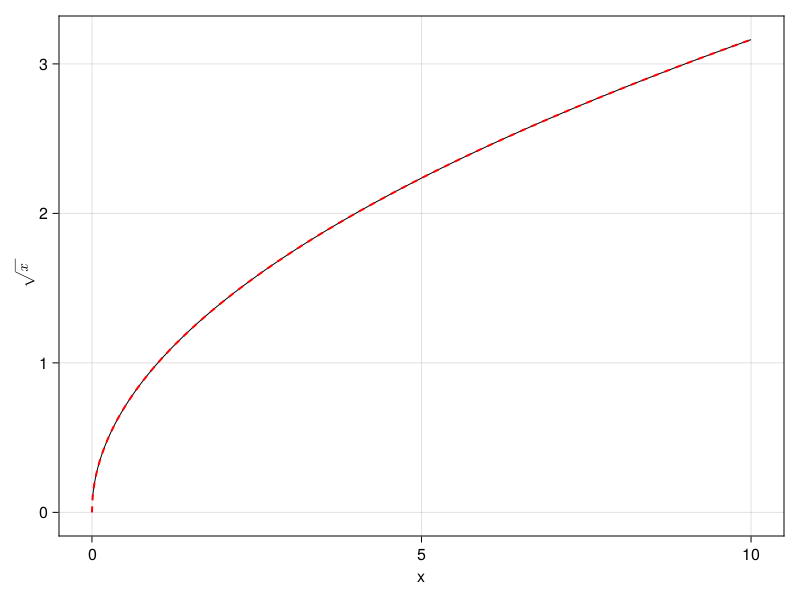

In [29]:
begin
    x = 0:0.01:10
	f = Figure()
	ax = Axis(f[1,1], 
		xlabel="x",
		ylabel=L"\sqrt{x}"
	)
    lines!(ax, x, Babilonia.(x, N=10), linewidth=1, color=:black)
    lines!(ax, x, sqrt.(x), linestyle=:dash, linewidth=2, color=:red)
    f
end

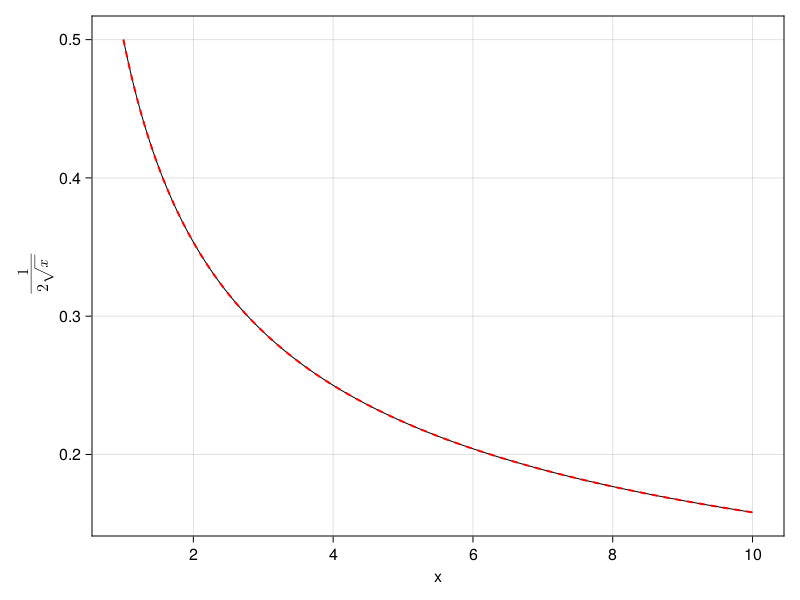

In [36]:
x = 1:0.01:10
f = Figure()
ax = Axis(f[1,1], 
    xlabel="x",
    ylabel=L"\frac{1}{2\sqrt{x}}"
)
y = [Babilonia(D((i,1))).f[2] for i in x]
lines!(ax, x, y, linewidth=1, color=:black)
lines!(ax, x, 0.5./sqrt.(x), linestyle=:dash, linewidth=2, color=:red)
f
